#Predição de ganho maior ou menor que 50k USD anual (base do senso de 1994)

#Importação das bibliotecas e análise dos dados

In [128]:
# Importação das bibliotecas utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
# Leitura do arquivo CSV

data = pd.read_csv('./sample_data/salary.csv')

In [130]:
# Visualização do aquivo com a biblioteca Pandas

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [131]:
# Comando para saber se existem dados nulos

data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [132]:
# Comando para entender o tipo de dados de cada coluna

data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [133]:
# Separando os dados para fazer a análise em quantitativos e qualitativos

quali = []
quant = []
for i in data.dtypes.index:
  if data.dtypes[i] == 'object':
    quali.append(i)
  else:
    quant.append(i)

In [134]:
print('Variáveis qualitativas:', quali)
print('Variáveis quantitativas:', quant)

Variáveis qualitativas: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']
Variáveis quantitativas: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [135]:
# Começando a fazer a análise dos dados quantitativos

data_quant = data[quant]
data_quant.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [136]:
# Função para cálculos de estatística sobre os dados

data_quant.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [137]:
data_quant.median()

age                   37.0
fnlwgt            178356.0
education-num         10.0
capital-gain           0.0
capital-loss           0.0
hours-per-week        40.0
dtype: float64

In [138]:
# Começando a fazer a análise dos dados qualitativos

data_quali = data[quali]
data_quali.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [139]:
# A análise aqui se resume em saber quantos dados temos em cada categioria das colunas

for i in data_quali.columns:
        print('----------------------')
        print('Variável: ',i)
        print(data_quali.groupby(i).sex.count())
        print('----------------------')

----------------------
Variável:  workclass
workclass
 ?                    1836
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
Name: sex, dtype: int64
----------------------
----------------------
Variável:  education
education
 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5355
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college     7291
Name: sex, dtype: int64
----------------------
----------------------
Variável:  marital-status
marital-status
 Divorced                  4443
 Married-AF-spouse           23
 Married-civ-spouse       14976
 Married-spouse-absent     

#Análise gráfica dos dados

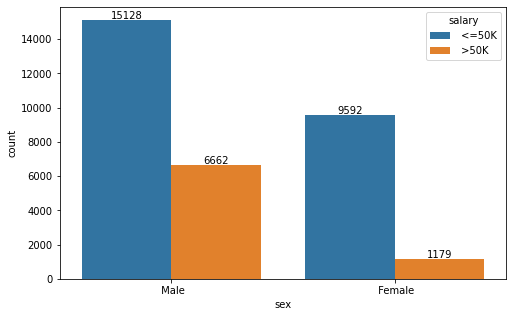

In [140]:
# Quantidade de pessoas que ganham mais que 50k USD/ano em relação ao sexo
# Nota-se que 44% dos homens ganhavam mais que 50k USD/ano
# Já nas mulheres, apenas 12% ganhavam mais que 50k USD/ano

fig, ax = plt.subplots(figsize=(8, 5))
graph = sns.countplot(x='sex', hue='salary', data=data, ax=ax);
for i in graph.patches:
  graph.annotate(i.get_height(),
               (i.get_x() + i.get_width() / 2, i.get_height()),
               ha = 'center', va = 'baseline', color='black', xytext=(0,1),
               textcoords='offset pixels')

In [141]:
# Função para transformar o número de horas trabalhadas em um intervalo para facilitar o gráfico!

def transformar1(val):
  if val > 40:
    return '40+'
  elif val <= 20:
    return '0-20'
  elif val > 20 and val <= 40:
    return '20-40'

data['horas_classe'] = data['hours-per-week'].map(transformar1)

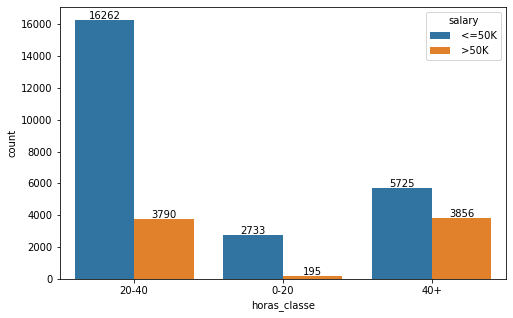

In [142]:
# Quantidade de horas trabalhadas X  ganhava ou não mais que 50k USD/ano
# Nota-se que é diretamente proporcional o aumento da quantidade de horas
# trabalhadas com ganhar mais que 50k USD/ano

fig, ax = plt.subplots(figsize=(8, 5))
graph1 = sns.countplot(x='horas_classe', hue='salary', data=data, ax=ax);
for i in graph1.patches:
  graph1.annotate(i.get_height(),
               (i.get_x() + i.get_width() / 2, i.get_height()),
               ha = 'center', va = 'baseline', color='black', xytext=(0,1),
               textcoords='offset pixels')

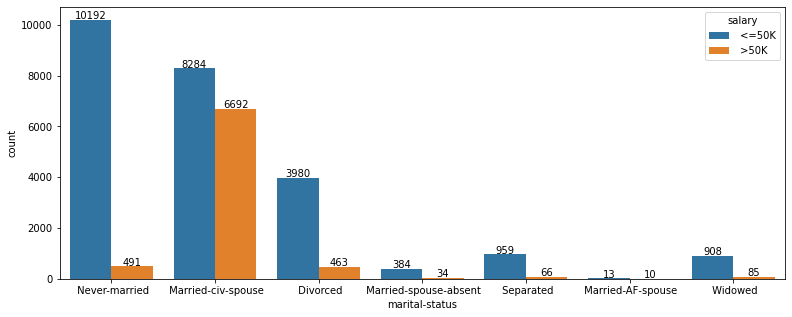

In [143]:
# Neste gráfico podemos ter uma ideia bem clara de que grande parte das pessoas
# casadas ganhava mais que 50k USD/ano, ou seja, essa feature é muito importante
# para o modelo de machine learning!

fig, ax = plt.subplots(figsize=(13, 5))
marital = sns.countplot(x='marital-status', hue='salary', data=data, ax=ax);
for i in marital.patches:
  marital.annotate(i.get_height(),
               (i.get_x() + i.get_width() / 2, i.get_height()),
               ha = 'center', va = 'baseline', color='black', xytext=(0,1),
               textcoords='offset pixels')

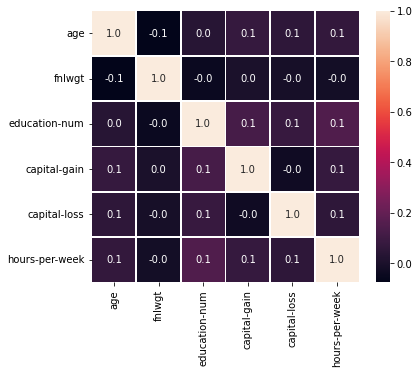

In [144]:
# Aqui conseguimos ver a correlação entre as variáveis do dataset

correlation = data.corr()
plt.figure(figsize=(6,5))
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

#Modelo de machine learning

In [145]:
# Mostrando novamente o dataset da exploração

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,horas_classe
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,20-40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0-20
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,20-40
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,20-40
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20-40


In [146]:
# Importando uma biblioteca para numerar as variáveis qualitativas, pois os modelos
# de machine learning só trabalham com números!

from sklearn.preprocessing import LabelEncoder

In [147]:
# Tratando todas as variáveis qualitativas com o Label Encoder

le = LabelEncoder()
data['workclass'] = le.fit_transform(data['workclass'])
data['education'] = le.fit_transform(data['education'])
data['marital-status'] = le.fit_transform(data['marital-status'])
data['occupation'] = le.fit_transform(data['occupation'])
data['relationship'] = le.fit_transform(data['relationship'])
data['race'] = le.fit_transform(data['race'])
data['sex'] = le.fit_transform(data['sex'])
data['native-country'] = le.fit_transform(data['native-country'])

In [148]:
# Veja como ficou o dataset depois do tratamento

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,horas_classe
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K,20-40
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K,0-20
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K,20-40
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K,20-40
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K,20-40


In [149]:
# Importando agora as bibliotecas para fazer a pervisão com machine learning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [150]:
# Separando as variáveis que usaremos para prever (X) e o resultado da previsão (y)

X = data.drop(['horas_classe', 'salary'], axis = 1)
y = data['salary']

In [151]:
# Separando os dados entre treino e validação com o train test split

Xtr, Xval, ytr, yval = train_test_split(X, y, random_state=0, test_size=0.3)

In [152]:
# Criando o modelo de machine learning RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [153]:
# Treinando nosso modelo com os dados de treino do dataset

modelo.fit(Xtr, ytr)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [154]:
# Fazendo as previsões com os dados de validação do dataset

p = modelo.predict(Xval)
p

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype=object)

In [155]:
# Métrica de acurácia exibida pelo modelo foi de 85%

res = np.mean(yval == p) * 100
res = res.round()
print(f'A acurácia foi de {res}%')

A acurácia foi de 85.0%
